# Notebook that demonstrates the use of the UF23 model

In [1]:
# to import the gmf.py, this cell should be only executed once after kernel restart
%cd ..

/afs/desy.de/user/f/flandgra/private/GMF/gammaALPs


In [2]:
from gammaALPs.bfields import gmf
import numpy as np
import matplotlib.pyplot as plt

fatal: No names found, cannot describe anything.


## Build coordinate arrays

In [44]:
x = np.arange(-20., 20.1, 0.1)
y = np.arange(-20., 20.1, 0.1)
z = np.arange(-5., 5.01, 0.01)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

In [4]:
rr = np.sqrt(xx**2 + yy**2)
pp = np.arctan2(yy, xx)

In [5]:
print(rr.shape)

(401, 401, 1001)


## Initialize GMF model

Initialze the UF23 class with one of 8 models (see https://arxiv.org/abs/2311.12120)|

In [35]:
models = ['base', 'expX', 'neCL', 'twistX', 'nebCor', 'cre10', 'synCG', 'spur']
model = 'neCL'

In [77]:
uf23 = gmf.UF23(model_type=model)

## Disk component

In [78]:
zplot = 0
idz = np.absolute(z-zplot).argmin()
print(idz)

500


In [79]:
Bdisk = np.zeros_like(rr[...,idz])
for i,r in enumerate(rr[...,idz]):
    # returns (3,N),(N) tuple, first entry is field, second entry is abs value
    b = uf23.Bdisk(rho=r, phi=pp[:,i,idz], z=zz[:,i,idz]) 
    Bdisk[:,i] = b[1] * gmf.signum(b[0][1,:])

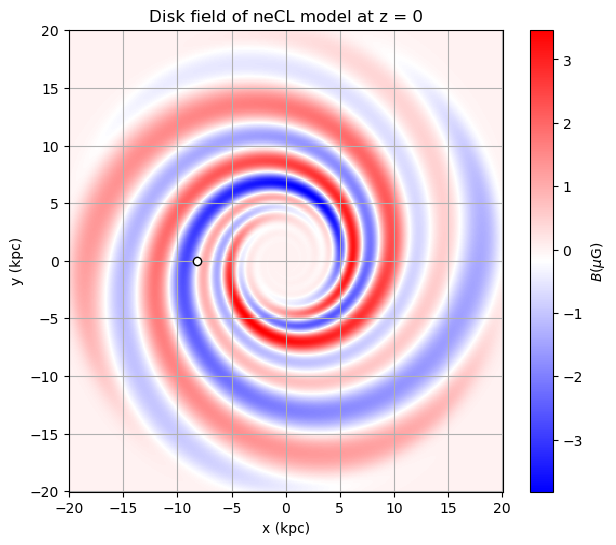

In [80]:
plt.figure(figsize=(7,6))
p = plt.pcolormesh(xx[...,idz], yy[...,idz], Bdisk, cmap = plt.cm.bwr, shading='auto')

plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.colorbar(p, label = '$B (\mu\mathrm{G})$')
plt.title(f"Disk field of {model} model at z = {zplot}")

plt.plot(-8.2, 0., marker='o', mec='k', mfc='w')
plt.grid()

plt.show()

## Poloidal halo component